In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def contour_coordinates(contour):
	'''
	Returns coordinates of a contour
	'''
	if cv2.contourArea(contour) > 10:
		M = cv2.moments(contour)
		return (int(M['m10']/M['m00']))
	
def frame_imshow_vis(img, tit = 'image'):
    cv2.imshow(tit, img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

def frame_plt_vis(img, fsize = (8, 8)):
    f, ax = plt.subplots(figsize=fsize)
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax.axis('off')
    return ax

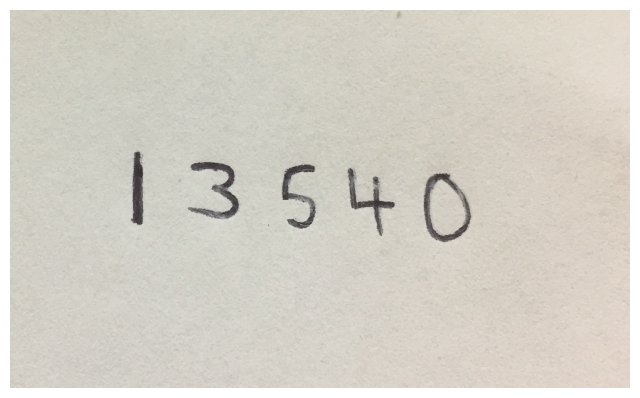

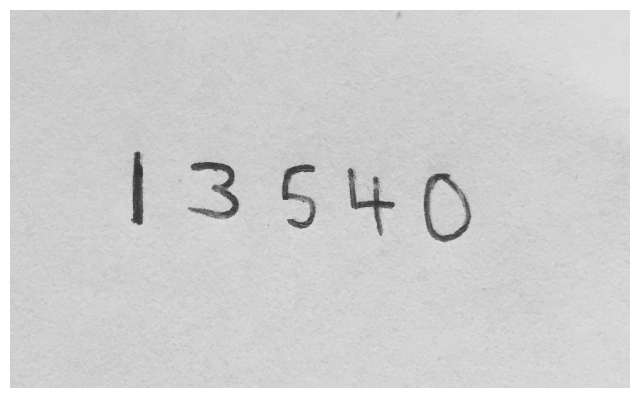

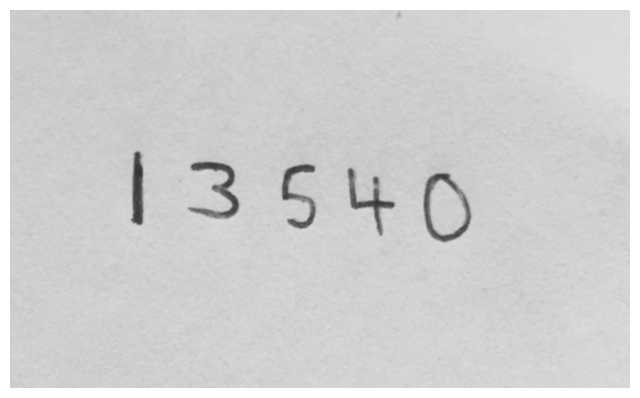

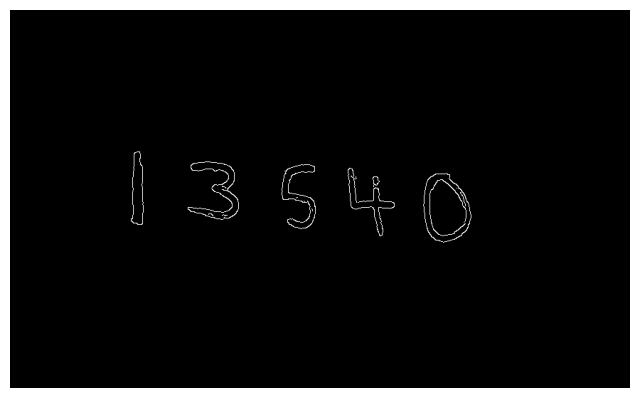

In [7]:
image = cv2.imread('images/text.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (5,5), 0)
canny = cv2.Canny(blur, 30, 150)

frame_plt_vis(image);
frame_plt_vis(gray);
frame_plt_vis(blur);
frame_plt_vis(canny);

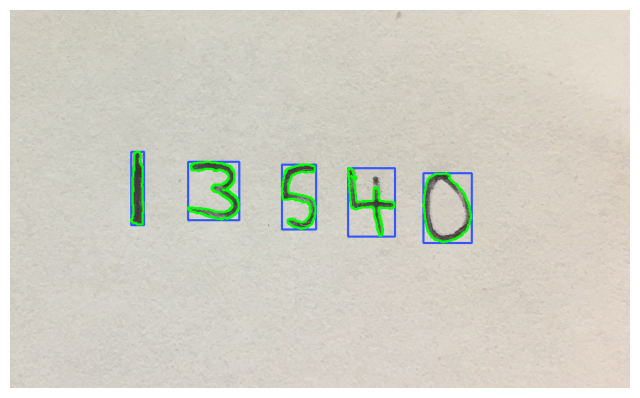

In [62]:
image_copy = image.copy()
contours, _ = cv2.findContours(canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
valid_contours = []
for contour in contours:
	(x, y, w, h) = cv2.boundingRect(contour)
	if w>= 5 and h>=60:
		valid_contours.append(contour)
		cv2.rectangle(image_copy, [x, y], [x+w, y+h], (255, 87, 51), 2)

cv2.drawContours(image_copy, valid_contours, -1, (0, 255, 0), 2)
frame_plt_vis(image_copy);